Projectile Motion Simulator

Enter initial velocity (m/s): 45
Enter launch angle (degrees): 30
Enter initial height (m): 2
Enable air resistance? (y/n): y


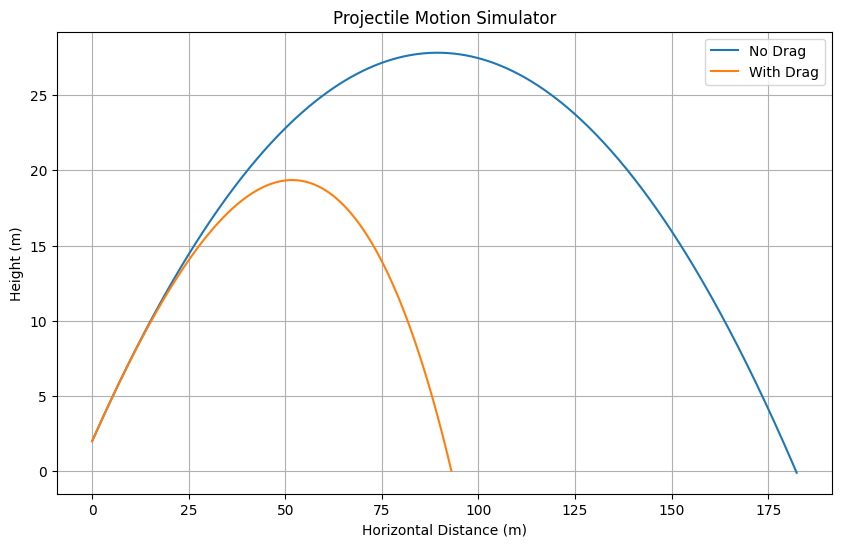


No Drag:
Max Height: 27.8115666410038
Time to Max Height: 2.2943614792003384
Time of Flight: 4.675953611037681
Range: 182.22725763342953

With Drag:
Max Height: 19.350288143985573
Time to Max Height: 1.729999999999985
Time of Flight: 3.84999999999994
Range: 92.98519368018508


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

g = 9.80665

def analytic_trajectory(v0, angle_deg, y0, dt=0.01):
    theta = math.radians(angle_deg)
    v0x = v0 * math.cos(theta)
    v0y = v0 * math.sin(theta)
    a = 0.5 * g
    b = -v0y
    c = -y0
    disc = b*b - 4*a*c
    t_flight = (-b + math.sqrt(disc)) / (2*a)
    t = np.arange(0, t_flight + dt, dt)
    x = v0x * t
    y = y0 + v0y * t - 0.5 * g * t*t
    t_h = v0y / g
    h_max = y0 + (v0y**2) / (2*g)
    return t, x, y, h_max, t_h, t_flight, v0x * t_flight

def rk4_step(state, dt, acc_func):
    def deriv(s):
        x, y, vx, vy = s
        ax, ay = acc_func(vx, vy)
        return np.array([vx, vy, ax, ay])
    k1 = deriv(state)
    k2 = deriv(state + 0.5 * dt * k1)
    k3 = deriv(state + 0.5 * dt * k2)
    k4 = deriv(state + dt * k3)
    return state + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)

def simulate_with_drag(v0, angle_deg, y0, m, Cd, A, rho=1.225, dt=0.005):
    theta = math.radians(angle_deg)
    vx = v0 * math.cos(theta)
    vy = v0 * math.sin(theta)
    state = np.array([0.0, y0, vx, vy])
    ts = []
    xs = []
    ys = []

    def acceleration(vx, vy):
        speed = math.hypot(vx, vy)
        drag = 0.5 * rho * Cd * A * speed * speed
        ax = -(drag/m) * (vx/speed) if speed != 0 else 0
        ay = -g - (drag/m) * (vy/speed) if speed != 0 else -g
        return ax, ay

    t = 0
    while state[1] >= 0:
        ts.append(t)
        xs.append(state[0])
        ys.append(state[1])
        state = rk4_step(state, dt, acceleration)
        t += dt

    ts = np.array(ts)
    xs = np.array(xs)
    ys = np.array(ys)
    idx = np.argmax(ys)
    h_max = ys[idx]
    t_h = ts[idx]
    return ts, xs, ys, h_max, t_h, ts[-1], xs[-1]

def run_simulation():
    v0 = float(input("Enter initial velocity (m/s): "))
    angle = float(input("Enter launch angle (degrees): "))
    y0 = float(input("Enter initial height (m): "))
    air_choice = input("Enable air resistance? (y/n): ").strip().lower()
    air_resistance = air_choice == "y"

    m = 0.145
    Cd = 0.47
    A = 0.0045
    rho = 1.225

    tA, xA, yA, hA, thA, tfA, rangeA = analytic_trajectory(v0, angle, y0)

    if air_resistance:
        tD, xD, yD, hD, thD, tfD, rangeD = simulate_with_drag(v0, angle, y0, m, Cd, A, rho)
    else:
        tD, xD, yD, hD, thD, tfD, rangeD = tA, xA, yA, hA, thA, tfA, rangeA

    plt.figure(figsize=(10,6))
    plt.plot(xA, yA, label="No Drag")
    if air_resistance:
        plt.plot(xD, yD, label="With Drag")
    plt.xlabel("Horizontal Distance (m)")
    plt.ylabel("Height (m)")
    plt.title("Projectile Motion Simulator")
    plt.grid(True)
    plt.legend()
    plt.show()

    print("\nNo Drag:")
    print("Max Height:", hA)
    print("Time to Max Height:", thA)
    print("Time of Flight:", tfA)
    print("Range:", rangeA)

    if air_resistance:
        print("\nWith Drag:")
        print("Max Height:", hD)
        print("Time to Max Height:", thD)
        print("Time of Flight:", tfD)
        print("Range:", rangeD)

run_simulation()
